In [1]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [11]:
df=df_data_1.rename(index=str,columns={'Unnamed: 0':'DataTech'})

In [12]:
df

,DataTech,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


# BarChart Generation for the data

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
df = df.sort_values(by='Very interested', ascending=False)

,DataTech,Very interested,Somewhat interested,Not interested
5,Machine Learning,1629,477,74
3,Data Visualization,1340,734,102
0,Big Data (Spark / Hadoop),1332,729,127
4,Deep Learning,1263,770,136
2,Data Journalism,429,1081,610


In [36]:
df['Sum']= df['Very interested']+df['Somewhat interested']+df['Not interested']
df['Very interested'] = df['Very interested']/df['Sum']
df['Somewhat interested'] = df['Somewhat interested']/df['Sum']
df['Not interested'] = df['Not interested']/df['Sum']
df=df.round({'Very interested':2,'Somewhat interested':2,'Not interested':2})
df=df.drop('Sum', axis=1)
df

,DataTech,Very interested,Somewhat interested,Not interested
1,Data Analysis / Statistics,0.77,0.20,0.03
5,Machine Learning,0.75,0.22,0.03
3,Data Visualization,0.61,0.34,0.05
0,Big Data (Spark / Hadoop),0.61,0.33,0.06
4,Deep Learning,0.58,0.36,0.06
2,Data Journalism,0.20,0.51,0.29


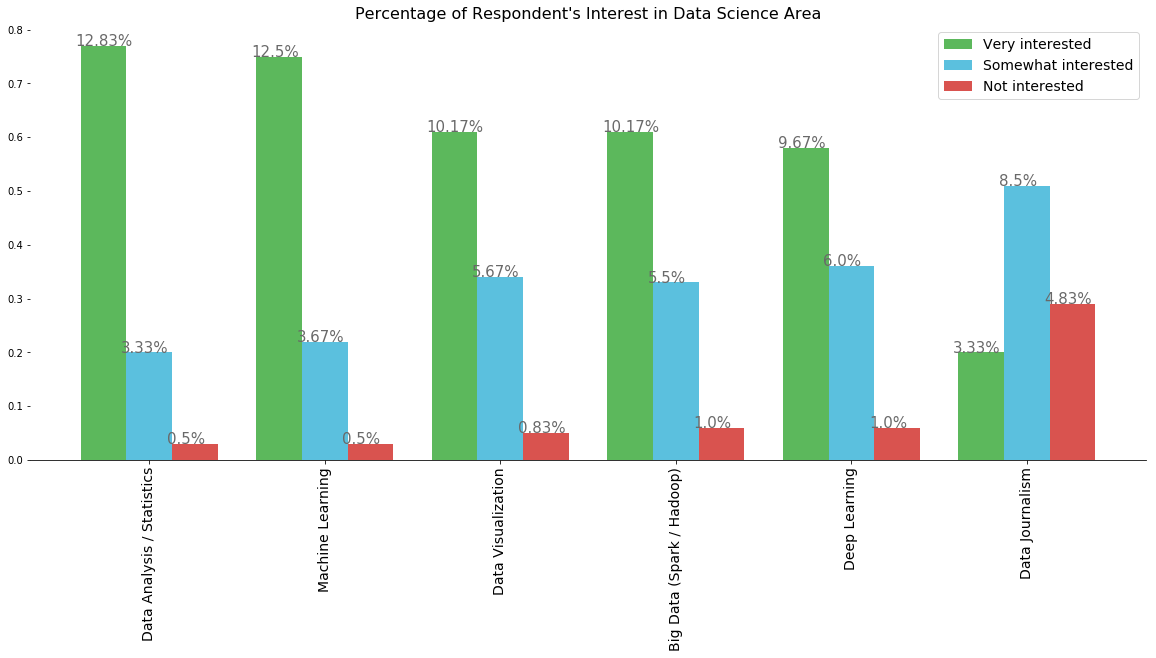

In [90]:
fig,ax=plt.subplots(figsize=(20,8))
width=0.26
pos=list(range(len(df['Very interested'])))
plt.bar(pos, 
        df['Very interested'], 
        width, 
        color='#5cb85c', 
        label=df['DataTech'][0]) 
'''
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')
'''
    
    
plt.bar([p + width for p in pos], 
        df['Somewhat interested'],
        width, 
        color='#5bc0de', 
        label=df['DataTech'][1])
'''
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')
''' 
plt.bar([p + width*2 for p in pos], 
        df['Not interested'], 
        width,  
        color='#d9534f', 
        label=df['DataTech'][2])
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')
    
ax.set_xticks([p + 1 * width for p in pos])
ax.set_xticklabels(df['DataTech'],fontsize=14, rotation=90)
plt.legend(['Very interested','Somewhat interested','Not interested'], loc='upper right',prop={'size':14})
plt.title("Percentage of Respondent's Interest in Data Science Area",fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('r1.png')